In [1]:
import cmath
import numpy as np
from skimage.transform import resize
import k3d
def Graph3D(Farray,Xarray=np.array([np.float32(x/10.0) for x in range (-10,10)]),Yarray=np.array([np.float32(y/10.0) for y in range (-10,10)]),axes=['T', 'z', 'Amp'], color_map=k3d.matplotlib_color_maps.Plasma ):
    plot = k3d.plot(axes=axes,grid_auto_fit=True);
    xmin, xmax,= np.min(Xarray.flatten()),np.max(Xarray.flatten()) ;
    ymin, ymax,= np.min(Yarray.flatten()),np.max(Yarray.flatten()) ;    
    cm = color_map; 
    z=10*Farray/np.max(Farray.flatten());
    z=z.real.astype(np.float32);
    plt_surface = k3d.surface(z, color_map=cm, attribute=z, color_range=[np.min(z.flatten()),np.max(z.flatten())], xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
    #plt_surface.grid=(-40, 40,ymin,ymax)
    #plot.grid=(-40, 40,ymin,ymax,np.min(z), np.max(z));
    scale_ratio=np.abs(xmax-xmin)/np.abs(ymax-ymin);
    if scale_ratio<1:
        scale_ratio=1/scale_ratio;
        
   #plt_surface.model_matrix=[[1.,  0.,  0.,  0.],
    #         [ 0., 1.0*scale_ratio,  0.,  0.],
    #         [ 0.,  0.,  0.1,  0.],
    #         [ 0.,  0.,  0.,  1]];
    plot += plt_surface;
    plot.render();
    #plot.display();
    return plot;
    

In [5]:
import numpy as np
import cmath
from utils import *
import time
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation


class Animation:
    numlines=0;
    Lines=list();
    def __init__(self, subplots=1 ):
        self.fig = plt.figure(1,figsize=(8,5));
        if (subplots>1):
            self.ax=list(range(subplots));
            for i in range(0,subplots):
                self.ax[i] = self.fig.add_subplot(subplots,1,i+1,xlim=(-25, 25), ylim=(1e-13,100), yscale='log');
    def initiate(self,subplots=1 ):
        del self.fig;
        #del self.ax
        self.fig = plt.figure(1,figsize=(8,5));
        if (subplots>1):
            self.ax=list(range(subplots));
            for i in range(0,subplots):
                if i>0:
                    self.ax[i] = self.fig.add_subplot(subplots,1,i+1,xlim=(-25, 25), ylim=(1e-13,100), yscale='log');   
                else:
                    self.ax[i] = self.fig.add_subplot(subplots,1,i+1,xlim=(-25, 25), ylim=(-4,4));    
                
    def set_data(self,subplot=1, yscale='linear',lw=1):
        if (yscale=='linear'):
            line=self.ax[subplot-1].plot([], [], linewidth=lw)[0]
            self.Lines.append(line);
        elif(yscale == 'log'):
            line=self.ax[subplot-1].semilogy([], [], linewidth=lw)[0]
            self.Lines.append(line);
        self.numlines=self.numlines+1;
        
    def animclosure(self,xxr,tt,hz,fun):
    
        self.xxr=xxr;
        self.tt=tt;
        self.hz=hz;
        self.fun=fun;
        NZ,N=xxr.shape
        self.nr=np.linalg.norm(xxr[0,:])*(np.max(tt)-np.min(tt))/ N;
        self.z=0
        errmax=-1e100;
        xr=xxr[0,:];
        
        self.Lines=[];
        #fig = plt.figure(1,figsize=(8,5))
        self.initiate(2);
        for i in range(4):
            self.set_data(1,'linear', (lambda lw: 0.5 if(lw==0) else 1)(i));
        for i in range(2):
            self.set_data(2,'log', (lambda lw: 0.5 if(lw==0) else 1)(i));
        #ax = plt.axes(xlim=(np.min(tt), np.max(tt)), ylim=(-2,2))
        #ax = fig.add_subplot(211,xlim=(np.min(tt), np.max(tt)), ylim=(-4,4))
       # line, = ax.plot([], [], linewidth=0.5)
       # line2, = ax.plot([], [], linewidth=1)
       # line11,=ax.plot([], [], linewidth=1)
       # line21,=ax.plot([], [], linewidth=1)

       # ax2=fig.add_subplot(212,xlim=(np.min(tt), np.max(tt)), ylim=(1e-13,100), yscale='log');
       # line3, = ax2.semilogy([], [], linewidth=0.5)
       # line4, = ax2.semilogy([], [], linewidth=1)
        #xr=np.arange(np.size(t)*int(REP), dtype=np.clongdouble).reshape(int(REP),np.size(t));
        #xr=np.arange(np.size(tt)*int(NZ), dtype=np.clongdouble).reshape(int(NZ),np.size(tt));
       # self.xe=np.arange(np.size(tt)*int(NZ), dtype=np.clongdouble).reshape(int(NZ),np.size(tt));
        #self.axe=np.arange(np.size(tt)*int(NZ), dtype=np.clongdouble).reshape(int(NZ),np.size(tt));
        #for n in range(2,NZ):
        print(self.hz)
        def animate1(i):
            self.z=self.z+self.hz;
            [self.xxr,self.xe,elapsed]=fun(self.tt,self.z);
            tcpu,niter=elapsed;
            self.ax[0].set_title(sprintf("elapsed: $\\tau_{cpu}$=%3.3f sec iter=%d, %d",tcpu,niter,i))
            
            self.axe=np.abs(self.xe);
            self.Lines[0].set_data(self.tt, self.axe);
            self.Lines[0].set_label('Psi')


            self.Lines[1].set_data(self.tt, np.abs(self.xxr));
            self.Lines[2].set_data(self.tt, np.real(self.xe));
            self.Lines[3].set_data(self.tt, np.real(self.xxr));

            self.Lines[4].set_data(self.tt,(np.abs(np.abs(self.xe)-np.abs(self.xxr))/self.nr)**2);
            self.Lines[5].set_data(self.tt,np.abs(((self.xe-self.xxr)/self.nr))**2);
         
            #self.em=20*np.log10(np.max(np.abs(self.xe[i+1]-self.xxr[i+1])/self.nr));
            #if errmax<self.em:
            #    errmax=self.em;
            #self.ax[1].set_title(sprintf("$\\epsilon=%3.2f [\\epsilon_{max}:%3.2f][dB]$  ",em,errmax))
            self.ax[1].grid(True)
            self.ax[0].grid(True)
            self.legend = plt.legend()
            self.ax[0].legend(self.Lines[0:4],['$|\\Psi_{an}|$','$|\\Psi_{num}|$','Re$\\Psi_{an}$','Re$\\Psi_{num}$'],loc="upper right")
            self.ax[1].legend(self.Lines[4:6],['$\\delta|\\Psi|$','$\\delta\\Psi$'],loc="upper right")

            return self.Lines[0],self.Lines[1],self.Lines[2],self.Lines[3],self.Lines[4],self.Lines[5]
        
        def animate2(i):
            self.z=self.z+self.hz;
            [self.xxr[i+1],self.xe[i+1],elapsed]=fun(self.tt,self.z);
            tcpu,niter=elapsed;
            self.ax[0].set_title(sprintf("elapsed: $\\tau_{cpu}$=%3.3f sec iter=%d",tcpu,niter))

            self.axe[i+1]=np.abs(self.xe[i+1]);
            self.Lines[0].set_data(self.tt, self.axe[i+1]);
            self.Lines[0].set_label('Psi')


            self.Lines[1].set_data(self.tt, np.abs(self.xxr[i+1]));
            self.Lines[2].set_data(self.tt, np.real(self.xe[i+1]));
            self.Lines[3].set_data(self.tt, np.real(self.xxr[i+1]));

            self.Lines[4].set_data(self.tt,(np.abs(np.abs(self.xe[i+1])-np.abs(self.xxr[i+1]))/self.nr)**2);
            self.Lines[5].set_data(self.tt,np.abs(((self.xe[i+1]-self.xxr[i+1])/self.nr))**2);

            #self.em=20*np.log10(np.max(np.abs(self.xe[i+1]-self.xxr[i+1])/self.nr));
            #if errmax<self.em:
            #    errmax=self.em;
            #self.ax[1].set_title(sprintf("$\\epsilon=%3.2f [\\epsilon_{max}:%3.2f][dB]$  ",em,errmax))
            self.ax[1].grid(True)
            self.ax[0].grid(True)
            self.legend = plt.legend()
            #self.ax[0].legend(self.Lines[0:4],['$|\\Psi_{an}$','$|\\Psi_{num}|$','Re$\\Psi_{an}$','Re$\\Psi_{num}$'],loc="upper right")
            #self.ax[1].legend(self.Lines[4:6],['$\\delta|\\Psi|$','$\\delta\\Psi$'],loc="upper right")
            
            return self.Lines[0],self.Lines[1],self.Lines[2],self.Lines[3],self.Lines[4],self.Lines[5]
        
        
        self.anima=animate1;
        return animate1
    def StartAnim(self,NZ):
        self.anim = FuncAnimation(self.fig, self.anima, frames=int(NZ), interval=200, blit=True, repeat=False)
    def __call__(self,NZ):
        self.StartAnim(NZ)
        

In [ ]:
#a=Animation();
#a.initiate(2);
#for i in range(4):
#    a.set_data(1,'linear', (lambda lw: 0.5 if(lw==0) else 1)(i));
#for i in range(2):
#    a.set_data(2,'log', (lambda lw: 0.5 if(lw==0) else 1)(i));

#a.Lines


Output()

Output()

Output()

<IPython.core.display.Javascript object>


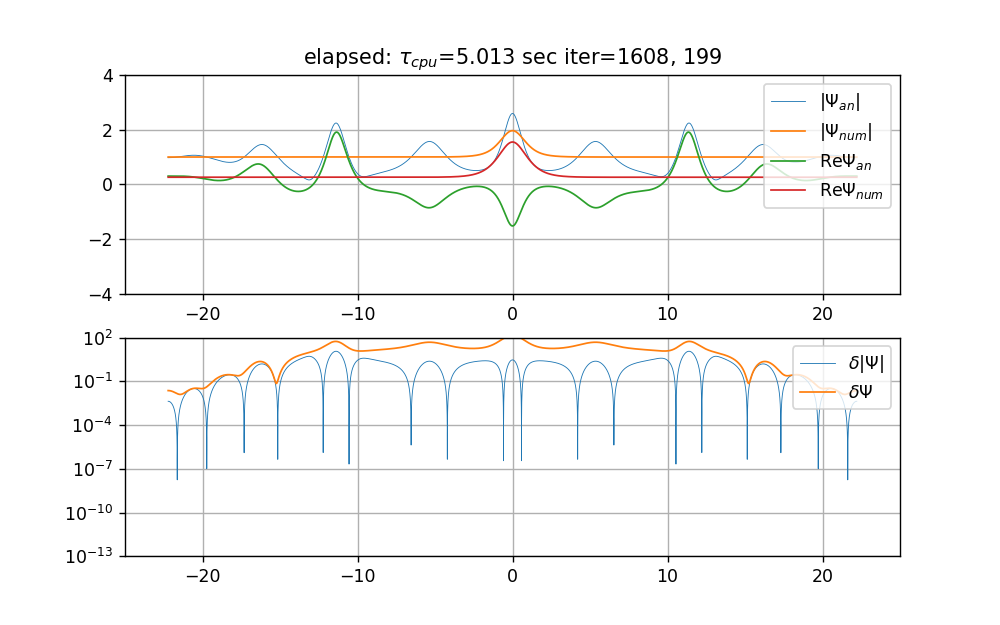

0.040389844892348786


In [6]:
from utils import *
from NLS.brizers import *
from NLS.nls_adapter import *
import cmath
import numpy as np
from skimage.transform import resize
from skimage.transform import downscale_local_mean
from matplotlib import pyplot as plt

from matplotlib.animation import FuncAnimation

from plots.k3dsurf import surf,cmps
#from plots.animclosure import *


import k3d

%matplotlib notebook

A=1-1/8
A=1
N=16*1024
NZ=1000;
NZ=200;

mm=256+256;
mm=2;
mm=32
mm=8

omagnus=0
#mm=256;
#omagnus=0
flags=-1;

flags=0;
alpha=0*1e-8;

sname='nls-exp-dec';
sname='nls';
#sname='ssf';omagnus=0
[pT,pZ]=brizerKM_periods(A);
LT=5*abs(pT);
LZ=8/11*2*2.5*abs(pZ);
NvT=200;
NvZ=300;
tLv=np.linspace(-LT,LT,NvT);
zLv=np.linspace(-LZ*0,LZ,NvZ);
[TTv,ZZv]=np.meshgrid(tLv,zLv);
#figure
#tic


surf(lambda T,Z: np.abs(brizerKM(T,Z,A)),[TTv,ZZv],Xmm=[-1,1],Ymm=[-1,1],axes=['T','z','|\\Psi(T,z)|'],cmp=cmps.twilight_shifted).display()

FFv=brizerKM(TTv,ZZv,A);
surf(FFv.real,[TTv,ZZv],Xmm=[-1,1],Ymm=[-1,1],axes=['T','z','\\Re\\Psi(T,z)']).display()
surf(FFv.imag,[TTv,ZZv],Xmm=[-1,1],Ymm=[-1,1],axes=['T','z','\\Im\\Psi(T,z)']).display()

tt=np.linspace(-LT,LT,N+1);
tt=tt[0:N]
g=1;
[nls,dzu,h]=nls_rescale_to(tt,sname,g);
hz=LZ/NZ; 
dz=hz* dzu/mm

nls.reset(dt=dz,nm=[4,4],omagnus=omagnus,alpha=alpha,w=1/3,flags=flags);

z=0;
x0=brizerKM(tt,z,A);


fun = lambda tt,z: [brizerKM(tt,z,A),nls(rep=int(mm),pp=1),nls.elapsed] 
#fun = lambda tt,z: [brizerKM(tt,z,A),brizerKM(tt,z,A),nls.elapsed] 




nls.x=x0;
xr=x0;
xe=x0;

xxr=np.zeros((NZ,N), dtype=complex);
xxr[0,:]=xr;



errmax=-1e100;
b=Animation();

animate1=b.animclosure(xxr,tt,hz,fun)
#anim = FuncAnimation(a.fig, animate1, frames=int(NZ), interval=200, blit=True, repeat=False)
#animate1(100);
b.StartAnim(200);
plt.show()

In [ ]:
type(b.Lines[0])

In [ ]:
hz